# Pymaceuticals Inc.
---

### Analysis

After analyzing the measurements for the Capomulin treatment, and considering that all duplicate values have been eliminated, the distribution between female and male subjects is proportional, and there are no outliers in the output measurements, we can conclude the following:


- There is a positive effect of the Capomulin regimen, as evidenced by a reduction in tumor volume at the end of the testing period.
- Weight is a significant factor in the effectiveness of Capomulin in reducing tumor volume, as indicated by the correlation value being close to 1.
 

In [151]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
all_data = pd.merge(study_results,mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])
all_data.head()

# Display the data table for preview
all_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [152]:
# Checking the number of mice.
mice_count =len(all_data["Mouse ID"].unique())
mice_count

249

In [153]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicated_rows = all_data[all_data.duplicated(subset=['Mouse ID', 'Timepoint'],keep=False)]
duplicated_mouse = duplicated_rows['Mouse ID'].unique()
duplicated_mouse

array(['g989'], dtype=object)

In [154]:
# Optional: Get all the data for the duplicate mouse ID.
duplicated_data = all_data[all_data['Mouse ID'].isin(duplicated_mouse)]
duplicated_data 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [155]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data=all_data[all_data['Mouse ID'] != 'g989']
clean_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [156]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count =len(clean_data["Mouse ID"].unique())
clean_mice_count 

248

## Summary Statistics

In [158]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

grouped_data = all_data.groupby('Drug Regimen')

mean= grouped_data['Tumor Volume (mm3)'].mean()
median= grouped_data['Tumor Volume (mm3)'].median()
variance= grouped_data['Tumor Volume (mm3)'].var()
std= grouped_data['Tumor Volume (mm3)'].std()
sem= grouped_data['Tumor Volume (mm3)'].sem()

summary_statistics = pd.DataFrame({
    'Mean Tumor Volume': mean,
    'Median Tumor Volume': median,
    'Tumor Volume Variance': variance,
    'Tumor Volume Std. Dev.': std,
    'Tumor Volume Std. Err': sem
})
summary_statistics


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [159]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = grouped_data['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_statistics 


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

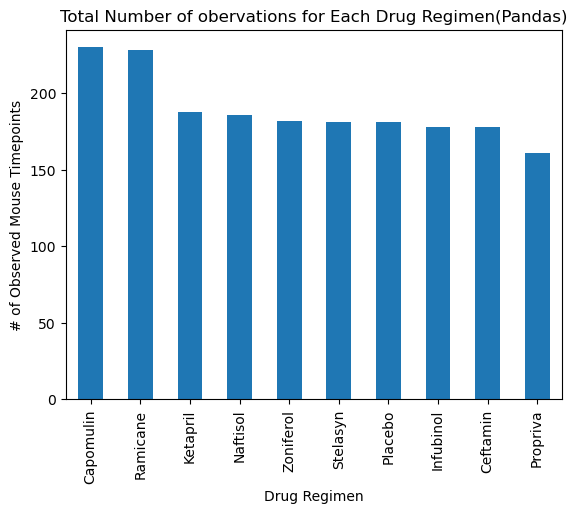

In [161]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = all_data['Drug Regimen'].value_counts()

obs_per_regimen = regimen_counts.plot(kind='bar', title='Total Number of obervations for Each Drug Regimen(Pandas)')
obs_per_regimen.set_xlabel('Drug Regimen')
obs_per_regimen.set_ylabel('# of Observed Mouse Timepoints')
obs_per_regimen.set_xticklabels(obs_per_regimen.get_xticklabels())  

plt.show()


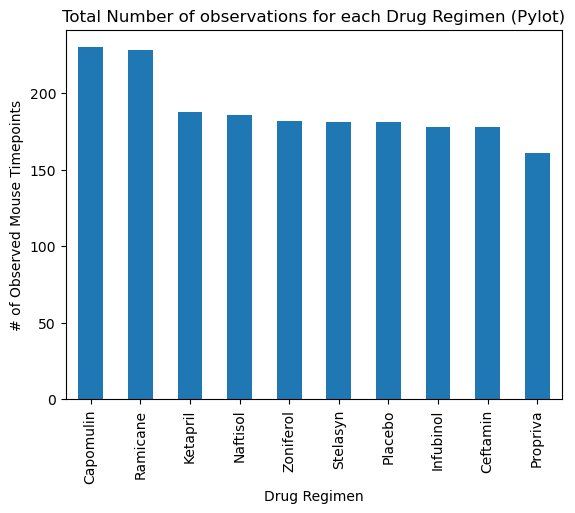

In [162]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

regimen_counts.plot(kind='bar')

plt.title('Total Number of observations for each Drug Regimen (Pylot)')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.show()


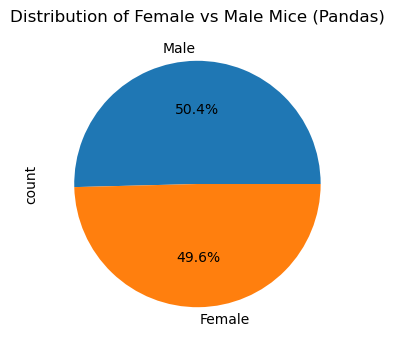

In [163]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = clean_data[['Mouse ID', 'Sex']].drop_duplicates()
gender_counts = unique_mice['Sex'].value_counts()

# Make the pie chart
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=0, figsize=(4,4), title='Distribution of Female vs Male Mice (Pandas)')
plt.show()




Text(0.5, 1.0, 'Distribution of Female vs Male Mice (Pyplot)')

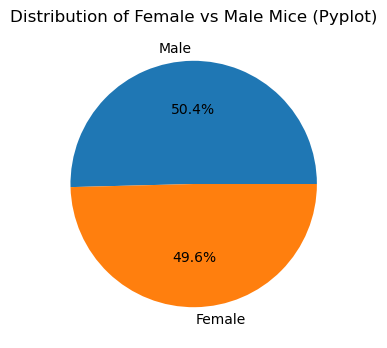

In [164]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
#(I'm using the ones that already create with pandas)

# Make the pie chart
plt.figure(figsize=(4,4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=0)
plt.title('Distribution of Female vs Male Mice (Pyplot)')


## Quartiles, Outliers and Boxplots

In [166]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filter_regimen = all_data[all_data['Drug Regimen'].isin(treatments)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = filter_regimen.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_vol = pd.merge(last_timepoint, filter_regimen, on=['Mouse ID', 'Timepoint'], how='left')
final_tumor_vol.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [167]:
# Put treatments into a list for for loop (and later for plot labels)
#I'm using the one I already create a step before -> treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_data = final_tumor_vol.loc[final_tumor_vol['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    # Append drug data to tumor_vol_data list
    # add subset
    tumor_vol_data.append(drug_data) 
    
    # Determine outliers using upper and lower bounds
    quartiles = drug_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    # Determine outliers
    outliers = drug_data[(drug_data < lower_bound) | (drug_data > upper_bound)]
    print(f"{drug}' potential outliers: {outliers}")


Capomulin' potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane' potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol' potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin' potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0, 0.5, 'Tumor Volume (mm3)')

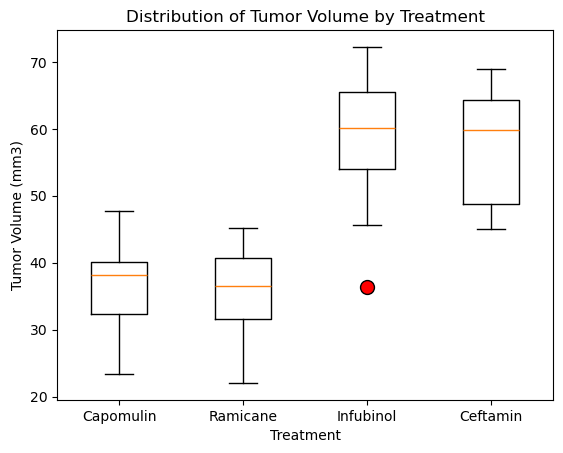

In [168]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

plt.boxplot(tumor_vol_data, labels=treatments, flierprops=dict(marker='o', markerfacecolor='red', markersize=10))
plt.title('Distribution of Tumor Volume by Treatment')
plt.xlabel('Treatment')
plt.ylabel('Tumor Volume (mm3)')

## Line and Scatter Plots

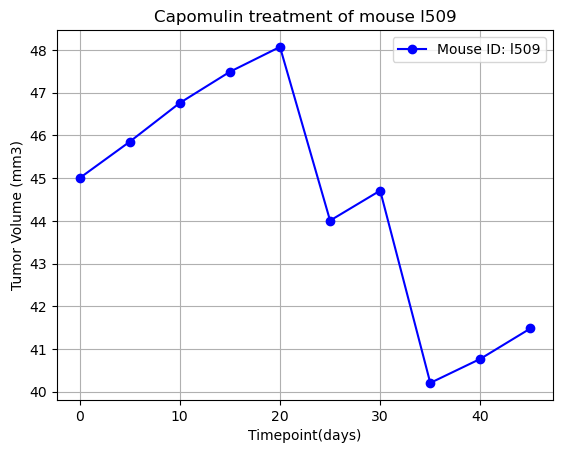

In [170]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_data = all_data[all_data['Drug Regimen'] == 'Capomulin']

# Choosing a single mouse from Capomulin treatment
mouse_id = 'l509'
single_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

# Generate the line plot
#plt.figure(figsize=(10,6))
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], marker='o', color='b', label=f'Mouse ID: {mouse_id}')
plt.title(f'Capomulin treatment of mouse {mouse_id}')
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend()
plt.grid()

# Display the plot
plt.show()


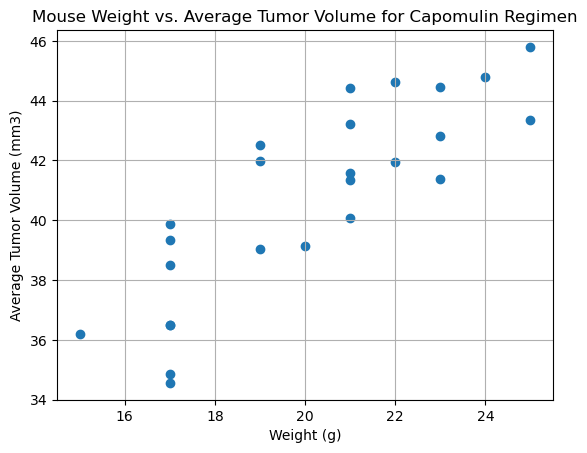

In [171]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#capomulin_data.head()

# Calculating the average tumor volume per mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Merging with weight data
mouse_weight = capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates()
merged_data = pd.merge(average_tumor_volume, mouse_weight, on='Mouse ID')


plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()

## Correlation and Regression

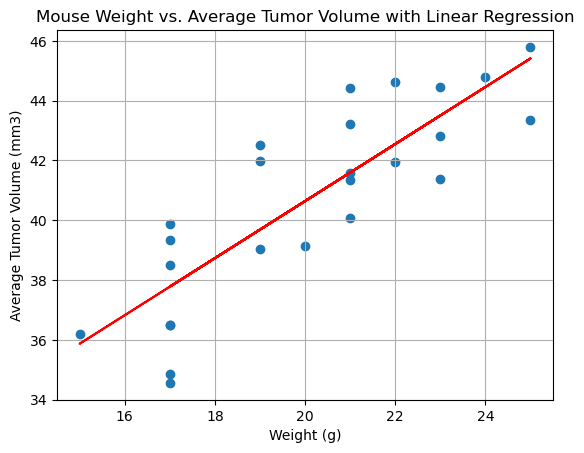

The correlation between mouse weight and the average tumor volume is 0.842


In [199]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# correlation coefficient
from scipy.stats import linregress #library to obtain liner regression without manual calculation
correlation = merged_data['Weight (g)'].corr(merged_data['Tumor Volume (mm3)'])

# linear regression
slope, intercept, r_value, p_value, std_err = linregress(
    merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)']
)

# Create the regression line
regression_line = merged_data['Weight (g)'] * slope + intercept

# Plotting the scatter plot with the regression line
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])
plt.plot(merged_data['Weight (g)'], regression_line, color='red')
plt.title('Mouse Weight vs. Average Tumor Volume with Linear Regression')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()

(correlation, slope, intercept, r_value**2, p_value)
print(f"The correlation between mouse weight and the average tumor volume is {correlation:.3f}")